<a href="https://colab.research.google.com/github/icsd13152/TextExtraction_from_image/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gtts
!pip install easyocr

import nltk
import re
from textblob import TextBlob
import spacy
from gtts import gTTS
import os
from spacy import displacy 
import cv2
# import pytesseract
import numpy as np
from nltk.stem import WordNetLemmatizer
import easyocr
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tabulate import tabulate
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


     |████████████████████████████████| 70.8 MB 12 kB/s 
     |████████████████████████████████| 47.6 MB 1.1 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Digital Image

Using CPU. Note: This module is much faster with a GPU.


[[([[108, 4], [296, 4], [296, 88], [108, 88]], 'SRorl', 0.6474158549619544), ([[563, 39], [623, 39], [623, 77], [563, 77]], '@GBn', 0.13915017247200012), ([[652, 16], [1121, 16], [1121, 118], [652, 118]], 'English_Languege', 0.5488804942917257), ([[371, 157], [415, 157], [415, 201], [371, 201]], 'Ls', 0.8872872242646164), ([[441, 146], [690, 146], [690, 233], [441, 233]], 'imporLanl', 0.40359843566575687), ([[708, 152], [892, 152], [892, 206], [708, 206]], 'because', 0.8416334441611568), ([[924, 150], [1110, 150], [1110, 202], [924, 202]], 'Es_one_', 0.21805818343572736), ([[98, 139], [343, 139], [343, 279], [98, 279]], 'Hanguaze', 0.27838112152172717), ([[123, 221], [175, 221], [175, 263], [123, 263]], '0L', 0.22815192102820187), ([[359, 221], [485, 221], [485, 265], [359, 265]], 'main', 0.9975535869598389), ([[524, 222], [652, 222], [652, 276], [524, 276]], 'Nays', 0.3860692083835602), ([[691, 212], [1081, 212], [1081, 272], [691, 272]], 'kocommunicale', 0.5532937242714459), ([[115, 

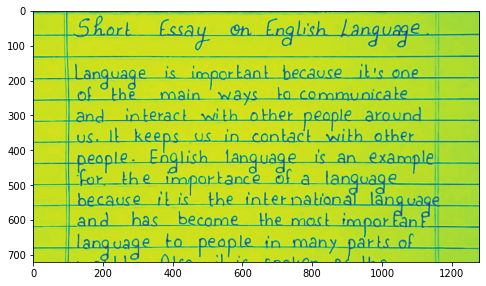

In [ ]:
from pylab import rcParams
# read the image
img = cv2.imread('hand.jpg', 0)

# # find the white rectangle
# th = img.copy()
# th[th<200] = 0

# bbox = np.where(th>0)
# y0 = bbox[0].min()
# y1 = bbox[0].max()
# x0 = bbox[1].min()
# x1 = bbox[1].max()

# # crop the region of interest (ROI)
# img = img[y0:y1, x0:x1]

# histogram equalization
equ = cv2.equalizeHist(img)
# Gaussian blur
blur = cv2.GaussianBlur(equ, (5, 5), 1)
new_image = cv2.medianBlur(img, 3)

# manual thresholding
th2 = 55 # this threshold might vary!
equ[equ>=th2] = 255
equ[equ<th2]  = 0

# Now apply the OCR on the processed image
rcParams['figure.figsize'] = 8, 16
plt.imshow(new_image)
reader = easyocr.Reader(['en'], gpu=False)
# images = ['handwritten1.jpg']
Docs = list()
result = reader.readtext(new_image)
Docs.append(result)
print(Docs)
# for img in images:
#     result = reader.readtext(img)
#     Docs.append(result)
# print(result)

In [ ]:
# font = cv2.FONT_HERSHEY_SIMPLEX
documents = list()
confidence = list()
# print(Docs)
for content in Docs:
    # print(content)
    tmpList = list()
    for text in content:
        tmpList.append(text[1])
        confidence.append((text[1],text[2]))
      
    documents.append(tmpList)
print(confidence) 
# print(documents)
finalDocs = list()
for d in documents:
    finalDocs.append(' '.join(i for i in d))

# finalDoc = ' '.join(i for i in document)
print(finalDocs)

# img = cv2.imread('Instagram.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()
# img = cv2.imread('annie-spratt-askpr0s66Rg-unsplash.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

[('1 livE in Lvv', 0.47546636711995194), ('Every', 0.9905182056934645), ('I', 0.44241633782122847), ("to; work' ly", 0.24790763931120657), ('%5', 0.8920909738133497), ('Also I wold', 0.48429278678619037), ('lke &o vislt Hars', 0.3448788287021614), ('day', 0.9995609749506621)]
["1 livE in Lvv Every I to; work' ly %5 Also I wold lke &o vislt Hars day"]


In [ ]:
def getBestScore(scores,threshold=0.80):
    best = list()
    counter = 0
    for text, score in scores:
        if score >= threshold:
            counter += 1
            best.append((text,score))
    return (best,counter,len(scores))

In [ ]:
bestFoundWords, totalBest, total= getBestScore(confidence,threshold=0.85)

print("With this threshold found ",totalBest, " words from ",total)


With this threshold found  159  words from  212


# Text Analysis using NLTK

In [ ]:
# tokensNLTK = list()
# for sete in finalDocs:
tokensNLTK = nltk.tokenize.word_tokenize(finalDocs[0])
print(tokensNLTK)
nltk.pos_tag(tokensNLTK)

['A', 'SAMPLE', 'NARRATI', 'VE', 'ESSAY', 'How', 'LEARNT', 'SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can', 'be', 'scary', 'experience', 'One', 'of', 'the', 'hardest', 'things', '|', "'ve", 'ever', 'had', 'was', 'learn', 'how', 't0', 'swim', 'was', 'always', 'afraid', 'of', 'the', 'water', 'but', 'decided', 'that', 'swimming', 'was', 'an', 'important', 'skill', 'that', 'should', 'Iearn', ';', 'also', 'thought', 'would', 'be', 'good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', 'did', "n't", 'realize', 'was', 'that', 'learning', 'to', 'swim', 'would', 'also', 'make', 'me', 'a', 'more', 'confident', 'person_', 'New', 'situations', 'always', 'make', 'me', 'nervous', 'and', 'my', 'first', 'swimming', 'lesson', 'was', 'no', 'exception', '.', 'After', 'changed', 'into', 'my', 'bathing', 'the', 'locker', 'room', 'stood', 'timidly', 'by', 'the', 'side', 'of', 'the', 'pool', 'waiting', 'for', 'the', 'teacher', 'and', 'other', 'students', 't0', 'show', 

[('A', 'DT'),
 ('SAMPLE', 'NNP'),
 ('NARRATI', 'NNP'),
 ('VE', 'NNP'),
 ('ESSAY', 'NNP'),
 ('How', 'NNP'),
 ('LEARNT', 'NNP'),
 ('SW', 'NNP'),
 ('MMING', 'NNP'),
 ('Learning', 'NNP'),
 ('som', 'VBD'),
 ('ething', 'VBG'),
 ('new', 'JJ'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('scary', 'JJ'),
 ('experience', 'NN'),
 ('One', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('hardest', 'JJS'),
 ('things', 'NNS'),
 ('|', 'VBP'),
 ("'ve", 'VBP'),
 ('ever', 'RB'),
 ('had', 'VBN'),
 ('was', 'VBD'),
 ('learn', 'JJ'),
 ('how', 'WRB'),
 ('t0', 'JJ'),
 ('swim', 'NN'),
 ('was', 'VBD'),
 ('always', 'RB'),
 ('afraid', 'VBN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('water', 'NN'),
 ('but', 'CC'),
 ('decided', 'VBD'),
 ('that', 'IN'),
 ('swimming', 'NN'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('important', 'JJ'),
 ('skill', 'NN'),
 ('that', 'WDT'),
 ('should', 'MD'),
 ('Iearn', 'NNP'),
 (';', ':'),
 ('also', 'RB'),
 ('thought', 'VBD'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('good', 'JJ'),
 ('exercise', 'NN'),
 ('and', 'CC'),
 ('help

# Text Analysis using SpaCy

In [ ]:

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
tokensSpacy1 = nlp(finalDocs[0])
tokensSpacy = list()
for token in tokensSpacy1:
    print(token.text,'->',token.pos_)
    tokensSpacy.append(token.text)

A -> DET
SAMPLE -> PROPN
NARRATI -> PROPN
VE -> PROPN
ESSAY -> PROPN
How -> ADV
LEARNT -> PROPN
SW -> PROPN
MMING -> PROPN
Learning -> PROPN
som -> NOUN
ething -> VERB
new -> ADJ
can -> VERB
be -> AUX
scary -> ADJ
experience -> NOUN
One -> NUM
of -> ADP
the -> DET
hardest -> ADJ
things -> NOUN
|'ve -> PROPN
ever -> ADV
had -> AUX
was -> AUX
learn -> VERB
how -> ADV
t0 -> PROPN
swim -> NOUN
was -> AUX
always -> ADV
afraid -> ADJ
of -> ADP
the -> DET
water -> NOUN
but -> CCONJ
decided -> VERB
that -> SCONJ
swimming -> NOUN
was -> AUX
an -> DET
important -> ADJ
skill -> NOUN
that -> DET
should -> VERB
Iearn -> VERB
; -> PUNCT
also -> ADV
thought -> VERB
would -> VERB
be -> AUX
good -> ADJ
exercise -> NOUN
and -> CCONJ
help -> VERB
me -> PRON
become -> VERB
physically -> ADV
stronger -> ADJ
_ -> PROPN
What -> PRON
did -> AUX
n't -> PART
realize -> VERB
was -> AUX
that -> SCONJ
learning -> VERB
to -> PART
swim -> VERB
would -> VERB
also -> ADV
make -> VERB
me -> PRON
a -> DET
more -> ADV
co

# Text Analysis using Custom Tokenizer

In [ ]:
def customTokenizer(text):
    pattern = re.compile(r'(?:[A-Z]\.)+|[A-Za-z]+\.|\d+(?:[\./]\d+)|n\'t|\b\w+(?!\'t)|\w+(?:-\w+)*|[!\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    for i in tmpTokens:
        i = i.strip()
        i = i.replace('/','\\/')
        tokens.append(i)
    
    return tokens

tokensCustom = customTokenizer(finalDocs[0])
print(tokensCustom)

['A', 'SAMPLE', 'NARRATI', 'VE', 'ESSAY', 'How', 'LEARNT', 'SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can', 'be', 'scary', 'experience', 'One', 'of', 'the', 'hardest', 'things', '|', "'", 've', 'ever', 'had', 'was', 'learn', 'how', 't0', 'swim', 'was', 'always', 'afraid', 'of', 'the', 'water', 'but', 'decided', 'that', 'swimming', 'was', 'an', 'important', 'skill', 'that', 'should', 'Iearn', ';', 'also', 'thought', 'would', 'be', 'good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', 'did', "n't", 'realize', 'was', 'that', 'learning', 'to', 'swim', 'would', 'also', 'make', 'me', 'a', 'more', 'confident', 'person_', 'New', 'situations', 'always', 'make', 'me', 'nervous', 'and', 'my', 'first', 'swimming', 'lesson', 'was', 'no', 'exception.', 'After', 'changed', 'into', 'my', 'bathing', 'the', 'locker', 'room', 'stood', 'timidly', 'by', 'the', 'side', 'of', 'the', 'pool', 'waiting', 'for', 'the', 'teacher', 'and', 'other', 'students', 't0', 'show', 

In [ ]:
def getGroundsFromFile(path, tokenizer = 'NLTK'):
    # path = 'essay2.txt'
    tokens = list()
    nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
    with open(path,'r') as f:
        text = f.read()
        tokensWordTokenize = nltk.tokenize.word_tokenize(text)
        docSpacy = nlp(text)
    tokensSpacy = list()
    for token in docSpacy:
        tokensSpacy.append(token.text)
    if tokenizer == 'NLTK':
        tokens = tokensWordTokenize
    else:
        tokens =  tokensSpacy   
    return tokens

In [ ]:
tokensGroundNLTK = getGroundsFromFile('es2.txt', tokenizer = 'NLTK')
tokensGroundSpacy = getGroundsFromFile('es2.txt', tokenizer = 'Spacy')

# Lemmatization

In [ ]:
def funclemmatize(tokens):
    lemmatizer = WordNetLemmatizer()


    for token in tokens:
        print(token, '->', lemmatizer.lemmatize(token))

In [ ]:
print("=============NLTK==============")
funclemmatize(tokensNLTK)
print("=============SpaCy==============")
funclemmatize(tokensSpacy)
# funclemmatize(correctedTextblob)
print("=============Custom==============")
funclemmatize(tokensCustom)

=============NLTK==============
A -> A
SAMPLE -> SAMPLE
NARRATI -> NARRATI
VE -> VE
ESSAY -> ESSAY
How -> How
LEARNT -> LEARNT
SW -> SW
MMING -> MMING
Learning -> Learning
som -> som
ething -> ething
new -> new
can -> can
be -> be
scary -> scary
experience -> experience
One -> One
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> 've
ever -> ever
had -> had
was -> wa
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> wa
always -> always
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decided
that -> that
swimming -> swimming
was -> wa
an -> an
important -> important
skill -> skill
that -> that
should -> should
Iearn -> Iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercise
and -> and
help -> help
me -> me
become -> become
physically -> physically
stronger_ -> stronger_
What -> What
did -> did
n't -> n't
realize -> realize
was -> wa
that -> that
learning -> learning
to -> to
swim -> swim
wou

# Stemming with PorterStemmer

In [ ]:


def porterStem(tokens): 
    ps = PorterStemmer()
#     tokenss = customTokenizer(sntnc)
    stems = list()
    for token in tokens:
        print(token, '->', ps.stem(token))
        stems.append(ps.stem(token))
    return stems

In [ ]:
print("=============NLTK==============")
stemsNLTK = porterStem(tokensNLTK)
print("=============Spacy==============")
stemsSpacy = porterStem(tokensSpacy)
# porterStem(correctedTextblob)
print("=============Custom==============")
stemsCustomTok = porterStem(tokensCustom)

=============NLTK==============
A -> A
SAMPLE -> sampl
NARRATI -> narrati
VE -> VE
ESSAY -> essay
How -> how
LEARNT -> learnt
SW -> SW
MMING -> mming
Learning -> learn
som -> som
ething -> eth
new -> new
can -> can
be -> be
scary -> scari
experience -> experi
One -> one
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> 've
ever -> ever
had -> had
was -> wa
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> wa
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decid
that -> that
swimming -> swim
was -> wa
an -> an
important -> import
skill -> skill
that -> that
should -> should
Iearn -> iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercis
and -> and
help -> help
me -> me
become -> becom
physically -> physic
stronger_ -> stronger_
What -> what
did -> did
n't -> n't
realize -> realiz
was -> wa
that -> that
learning -> learn
to -> to
swim -> swim
would -> would
also -> also
make -

# Stemming with SnowballStemmer

In [ ]:

def snowballStem(tokens, lng):
    sb = SnowballStemmer(lng)
    stems = list()
    for wd in tokens:
        print(wd, '->', sb.stem(wd))
        stems.append(sb.stem(wd))
    return stems

In [ ]:
print("=============NLTK==============")
stemsSnowNLTK = snowballStem(tokensNLTK, 'english')
print("=============SpaCy==============")
stemsSnowSpacy = snowballStem(tokensSpacy, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
stemsSnowCustomTok = snowballStem(tokensCustom, 'english')

=============NLTK==============
A -> a
SAMPLE -> sampl
NARRATI -> narrati
VE -> ve
ESSAY -> essay
How -> how
LEARNT -> learnt
SW -> sw
MMING -> mming
Learning -> learn
som -> som
ething -> eth
new -> new
can -> can
be -> be
scary -> scari
experience -> experi
One -> one
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> ve
ever -> ever
had -> had
was -> was
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> was
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decid
that -> that
swimming -> swim
was -> was
an -> an
important -> import
skill -> skill
that -> that
should -> should
Iearn -> iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercis
and -> and
help -> help
me -> me
become -> becom
physically -> physic
stronger_ -> stronger_
What -> what
did -> did
n't -> n't
realize -> realiz
was -> was
that -> that
learning -> learn
to -> to
swim -> swim
would -> would
also -> also
mak

# Custom Stemmer

In [ ]:
def customStemming(token): #(\w+?)(?=ly|es|(?<!s)s|y)
    stems = re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$',token)
    stem = stems[0][0]
    return stem


In [ ]:
def getStemsFromCustom(tokens):
    stems = list()
    for t in tokens:
        print(t, '->', customStemming(t))
        stems.append(customStemming(t))
    return stems

In [ ]:
stemsCustomNLTK = getStemsFromCustom(tokensNLTK)
stemsCustom = getStemsFromCustom(tokensCustom)
stemsCustomSpacy = getStemsFromCustom(tokensSpacy)

A -> A
SAMPLE -> SAMPLE
NARRATI -> NARRATI
VE -> VE
ESSAY -> ESSAY
How -> How
LEARNT -> LEARNT
SW -> SW
MMING -> MMING
Learning -> Learn
som -> som
ething -> eth
new -> new
can -> can
be -> be
scary -> scary
experience -> experience
One -> One
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> 've
ever -> ever
had -> had
was -> wa
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> wa
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decid
that -> that
swimming -> swimm
was -> wa
an -> an
important -> important
skill -> skill
that -> that
should -> should
Iearn -> Iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercise
and -> and
help -> help
me -> me
become -> become
physically -> physical
stronger_ -> stronger_
What -> What
did -> did
n't -> n't
realize -> realize
was -> wa
that -> that
learning -> learn
to -> to
swim -> swim
would -> would
also -> also
make -> make
me -> me
a 

In [ ]:
def getGroundsFromFileStem(path, tokenizer = 'NLTK',stemmer = 'Porter'):
    # path = 'essay2.txt'
    tokens = list()
    stems = list()
    nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
    with open(path,'r') as f:
        text = f.read()
        tokensWordTokenize = nltk.tokenize.word_tokenize(text)
        docSpacy = nlp(text)
    tokensSpacy = list()
    for token in docSpacy:
        tokensSpacy.append(token.text)
    if tokenizer == 'NLTK':
        tokens = tokensWordTokenize
    else:
        tokens =  tokensSpacy 
    # print(tokens)
    if stemmer == 'Porter':
       stems = porterStem(tokens)
    else:
       stems = snowballStem(tokens,'english')  
    return stems

In [ ]:
stemsGroundNLTKPorter = getGroundsFromFileStem('es2.txt','NLTK','Porter')
stemsGroundSpaCyPorter = getGroundsFromFileStem('es2.txt','SpaCy','Porter')
stemsGroundNLTKSnow = getGroundsFromFileStem('es2.txt','NLTK','SnowBall')
stemsGroundSpaCySnow = getGroundsFromFileStem('es2.txt','SpaCy','SnowBall')

A -> A
SAMPLE -> sampl
NARRATIVE -> narr
ESSAY -> essay
HOW -> how
I -> I
LEARNT -> learnt
SWIMMINGLearning -> swimminglearn
something -> someth
new -> new
can -> can
be -> be
a -> a
scary -> scari
experience -> experi
. -> .
One -> one
of -> of
the -> the
hardest -> hardest
things -> thing
I -> I
've -> 've
ever -> ever
had -> had
to -> to
do -> do
was -> wa
learn -> learn
how -> how
to -> to
swim -> swim
. -> .
I -> I
was -> wa
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
, -> ,
but -> but
I -> I
decided -> decid
that -> that
swimming -> swim
was -> wa
an -> an
important -> import
skill -> skill
that -> that
I -> I
should -> should
learn -> learn
. -> .
I -> I
also -> also
thought -> thought
it -> it
would -> would
be -> be
good -> good
exercise -> exercis
and -> and
help -> help
me -> me
to -> to
become -> becom
physically -> physic
stronger -> stronger
. -> .
What -> what
I -> I
did -> did
n't -> n't
realize -> realiz
was -> wa
that -> that
learning -> learn


In [ ]:
displacy.render(tokensSpacy1, style='dep',jupyter=True)

# Metrics And Analysis

In [ ]:
# def joinGroundTruthTokenInOneList(grounTruth):
#     tokens = list()
#     for index in range(len(grounTruth)):
#         tokens.append(tmpTokens[index])
#     return tokens


def calcPrecision(texts, grounTruth): 
    precision = 0.0

    counter = 0 
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    print("No. of groundTruthTokens = ",len(grounTruth))
    relevantTokens = counter
    print("Relevant Tokens = ",relevantTokens)
    retrievedTokens = len(texts)
    print("Retrieved Tokens = ",retrievedTokens)
    precision = relevantTokens  / retrievedTokens
    print("Precision = ",precision)
   
    return precision

    
def calcRecall(texts, grounTruth):
    recall = 0.00
    counter = 0    
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    relevantTokens = counter
    correctTokens = len(grounTruth)
    recall = relevantTokens  / correctTokens
    print("Recall = ",recall)
         
    return recall

def calcF1Score(precision, recall):
    f1 = (2 * precision * recall) / (precision + recall)
    return f1


    
# files = treebank.fileids()
# customTokens = customTokenizer(text)
# groundTruthTokens = joinGroundTruthTokenInOneList(files)

# groundTruthSentences = joinGroundTruthTokenInOneList(files,False)

In [ ]:
from nltk.probability import FreqDist
# def getFreq(tokens):



dicNLTK = FreqDist(tokensNLTK)
dicSpacy = FreqDist(tokensSpacy)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom)
filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens2 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens3 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed1_1 = len(filter_tokens1)/len(dicNLTK)
observed1_2 = len(filter_tokens2)/len(dicSpacy)
observed1_3 = len(filter_tokens3)/len(diccustom)
top30_1NLTK = FreqDist(tokensNLTK).most_common(40)
top30_1Spacy = FreqDist(tokensSpacy).most_common(40)
top30_1Custom = FreqDist(tokensCustom).most_common(40)

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  524
Relevant Tokens =  395
Retrieved Tokens =  446
Precision =  0.8856502242152466
Recall =  0.7538167938931297
F1 - Score =  0.8144329896907216
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  556
Relevant Tokens =  400
Retrieved Tokens =  446
Precision =  0.8968609865470852
Recall =  0.7194244604316546
F1 - Score =  0.7984031936127745
==============NLTK as grountTruth==============
No. of groundTruthTokens =  449
Relevant Tokens =  438
Retrieved Tokens =  446
Precision =  0.9820627802690582
Recall =  0.9755011135857461
F1 - Score =  0.9787709497206704
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  461
Relevant Tokens =  429
Retrieved Tokens =  446
Precision =  0.9618834080717489
Recall =  0.93058568329718
F1 - Score =  0.9459757442116868


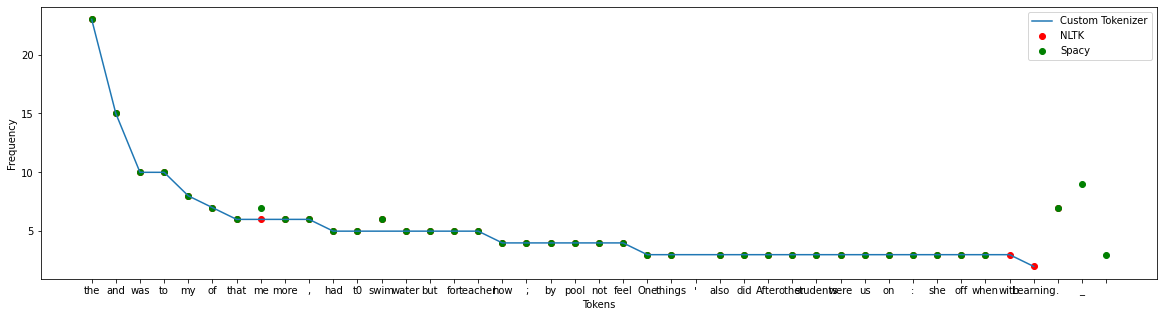

In [ ]:
print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTK = calcPrecision(tokensCustom,tokensGroundNLTK)    
recallNLTK = calcRecall(tokensCustom, tokensGroundNLTK)
f1nltkEN = calcF1Score(precisionNLTK, recallNLTK)
print("F1 - Score = ",f1nltkEN)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpac = calcPrecision(tokensCustom, tokensGroundSpacy)    
recallSpac = calcRecall(tokensCustom, tokensGroundSpacy)
f1Spac = calcF1Score(precisionSpac, recallSpac)
print("F1 - Score = ",f1Spac)

print("==============NLTK as grountTruth==============")
precisionNLTK2 = calcPrecision(tokensCustom,tokensNLTK)    
recallNLTK2 = calcRecall(tokensCustom, tokensNLTK)
f1nltkEN2 = calcF1Score(precisionNLTK2, recallNLTK2)
print("F1 - Score = ",f1nltkEN2)
print("==============SpaCy as grountTruth==============")
precisionSpac2 = calcPrecision(tokensCustom, tokensSpacy)    
recallSpac2 = calcRecall(tokensCustom, tokensSpacy)
f1Spac2 = calcF1Score(precisionSpac2, recallSpac2)
print("F1 - Score = ",f1Spac2)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



# precision = calcPrecision(tokensSpacy, groundTruthTokens)    
# recall = calcRecall(tokensSpacy, groundTruthTokens)
# f1spacyEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f1spacyEN)
# dic3 = FreqDist(tokensSpacy)
# filter_tokens3 = dict([(m, n) for m, n in dic3.items() if n == 1])
# observed1_3 = len(filter_tokens3)/len(dic3)
# top30_3 = FreqDist(tokensSpacy).most_common(30)
# top30_3Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_3),label='SpaCy en_core_web_sm')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()



# precision = calcPrecision(customTokens, groundTruthTokens)    
# recall = calcRecall(customTokens, groundTruthTokens)
# f2custonEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f2custonEN)
# dic4 = FreqDist(customTokens)
# filter_tokens4 = dict([(m, n) for m, n in dic4.items() if n == 1])
# observed1_4 = len(filter_tokens4)/len(dic4)
# top30_4 = FreqDist(customTokens).most_common(30)
# top30_4Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_4),label='Custom Tokenizer')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()

In [ ]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer   │   Frequency = 1 (%) │
╞════╪═════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                      │            0.669456 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                   │            0.64557  │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                  │            0.672199 │
╘════╧═════════════════════════════════════════════════════════╧═════════════════════╛


In [ ]:

info = {'Tokenizer': ['NLTK as GroundTruth from File','SpaCy as GroundTruth from File'], 'F1-Score': [f1nltkEN,f1Spac],
       'Precision':[precisionNLTK,precisionSpac],'Recall':[recallNLTK,recallSpac]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer                      │   F1-Score │   Precision │   Recall │
╞════╪════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth from File  │   0.814433 │    0.88565  │ 0.753817 │
├────┼────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth from File │   0.798403 │    0.896861 │ 0.719424 │
╘════╧════════════════════════════════╧════════════╧═════════════╧══════════╛


In [ ]:
info = {'Tokenizer': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2,f1Spac2],
       'Precision':[precisionNLTK2,precisionSpac2],'Recall':[recallNLTK2,recallSpac2]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer            │   F1-Score │   Precision │   Recall │
╞════╪══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth  │   0.978771 │    0.982063 │ 0.975501 │
├────┼──────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth │   0.945976 │    0.961883 │ 0.930586 │
╘════╧══════════════════════╧════════════╧═════════════╧══════════╛


In [ ]:
print("==============NLTK as grountTruth from GroundTruth File and Porter==============")
precisionNLTKPorter = calcPrecision(stemsCustomNLTK,stemsGroundNLTKPorter)    
recallNLTKPorter = calcRecall(stemsCustomNLTK, stemsGroundNLTKPorter)
f1nltkENPorter = calcF1Score(precisionNLTKPorter, recallNLTKPorter)
print("F1 - Score = ",f1nltkENPorter)
print("==============SpaCy as grountTruth from GroundTruth File and Porter==============")
precisionSpacPorter = calcPrecision(stemsCustomSpacy, stemsGroundSpaCyPorter)    
recallSpacPorter = calcRecall(stemsCustomSpacy, stemsGroundSpaCyPorter)
f1SpacPorter = calcF1Score(precisionSpacPorter, recallSpacPorter)
print("F1 - Score = ",f1SpacPorter)

print("==============NLTK as grountTruth from GroundTruth File and SnowBall==============")
precisionNLTKSnow = calcPrecision(stemsCustomNLTK,stemsGroundNLTKSnow)    
recallNLTKSnow = calcRecall(stemsCustomNLTK, stemsGroundNLTKSnow)
f1nltkENSnow = calcF1Score(precisionNLTKSnow, recallNLTKSnow)
print("F1 - Score = ",f1nltkENSnow)
print("==============SpaCy as grountTruth from GroundTruth File and SnowBall==============")
precisionSpacSnow = calcPrecision(stemsCustomSpacy, stemsGroundSpaCySnow)    
recallSpacSnow = calcRecall(stemsCustomSpacy, stemsGroundSpaCySnow)
f1SpacPSnow = calcF1Score(precisionSpacSnow, recallSpacSnow)
print("F1 - Score = ",f1SpacPSnow)

# print("==============NLTK as grountTruth==============")
# precisionNLTK2 = calcPrecision(tokensCustom,tokensNLTK)    
# recallNLTK2 = calcRecall(tokensCustom, tokensNLTK)
# f1nltkEN2 = calcF1Score(precisionNLTK2, recallNLTK2)
# print("F1 - Score = ",f1nltkEN2)
# print("==============SpaCy as grountTruth==============")
# precisionSpac2 = calcPrecision(tokensCustom, tokensSpacy)    
# recallSpac2 = calcRecall(tokensCustom, tokensSpacy)
# f1Spac2 = calcF1Score(precisionSpac2, recallSpac2)
# print("F1 - Score = ",f1Spac2)
# # dicNLTK = FreqDist(tokensNLTK)
# # filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# # observed1_1 = len(filter_tokens1)/len(dic)
# # top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# # top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

# plt.figure(figsize=(20, 5))
# plt.plot(*zip(*top30_1Custom),label='Custom Tokenizer')
# plt.scatter(*zip(*top30_1NLTK),color = 'red',label='NLTK')
# plt.scatter(*zip(*top30_1Spacy),color = 'green',label='Spacy')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()

==============NLTK as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  524
Relevant Tokens =  335
Retrieved Tokens =  449
Precision =  0.7461024498886414
Recall =  0.6393129770992366
F1 - Score =  0.6885919835560124
==============SpaCy as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  556
Relevant Tokens =  342
Retrieved Tokens =  461
Precision =  0.7418655097613883
Recall =  0.6151079136690647
F1 - Score =  0.672566371681416
==============NLTK as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  524
Relevant Tokens =  324
Retrieved Tokens =  449
Precision =  0.7216035634743875
Recall =  0.6183206106870229
F1 - Score =  0.6659815005138746
==============SpaCy as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  556
Relevant Tokens =  330
Retrieved Tokens =  461
Precision =  0.7158351409978309
Recall =  0.5935251798561151
F1 - Score =

In [ ]:
info = {'Tokenizer and Stemmer': ['NLTK and Porter as GroundTruth','SpaCy and Porter as GroundTruth','NLTK and SnowBall as GroundTruth','SpaCy and Snowball as GroundTruth'], 
        'F1-Score': [f1nltkENPorter,f1SpacPorter,f1nltkENSnow,f1SpacPSnow],
       'Precision':[precisionNLTKPorter,precisionSpacPorter,precisionNLTKSnow,precisionSpacSnow],'Recall':[recallNLTKPorter,recallSpacPorter,recallNLTKSnow,recallSpacSnow]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer and Stemmer             │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK and Porter as GroundTruth    │   0.688592 │    0.746102 │ 0.639313 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy and Porter as GroundTruth   │   0.672566 │    0.741866 │ 0.615108 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  2 │ NLTK and SnowBall as GroundTruth  │   0.665982 │    0.721604 │ 0.618321 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  3 │ SpaCy and Snowball as GroundTruth │   0.648968 │    0.715835 │ 0.593525 │
╘════╧═══════════════════════════════════╧════════════╧═════════════╧══════════╛
